In [41]:
import rebound  # will only work if rebound is installed in your python distro
import numpy as np  # generic math stuff 
import matplotlib.pyplot as plt  # generic plotting stuff 
%matplotlib inline 

# to install rebound see 
#    https://rebound.readthedocs.io/en/latest/

### A Problem for problem set #3

In the two body problem, an elliptical orbit remains at a fixed orientation.  However if there are three bodies, orbits can slowly change shape and orientation. 
We consider a mass in an elliptical orbit. If the longitude of pericenter $\varpi$ slowly drifts, the orbit is <i> precessing </i>. 

Similarly a drift in the longitude of the ascending node $\Omega$ is also called precession.  

<b> Your goal </b> is to use an numerical integration to measure the precession rates, $\dot \varpi$ and 
$\dot \Omega$, for a massless particle.  The massless particle is in orbit about a central mass (a star).  There is also 
a planet in orbit about the central star. The planet's orbit does not precess because there are only two masses present, 
the planet and the central star.  However, the third object, the massless particle feels gravitational forces from two bodies and so its orbit precesses. 

First make sure you have a generic python distribution (such as anaconda) installed on your laptop (with scipy, numpy and matplotlib packages). 

Install rebound following https://rebound.readthedocs.io/en/latest/

To learn how to use <b> rebound</b>:  there is a link to youtube videos here https://rebound.readthedocs.io/en/latest/, there are lots of nice examples on the github site,  https://github.com/hannorein/rebound/blob/main/ipython_examples/
there is the code itself (to read on github) and there is the help command.  Online notebooks of tutorials that used to be available are probably obsolete and have not yet been revived, as far as I can tell (as of fall 2024). Hanno seems to be vehement about NOT providing api specs, however a command like  <b> help(rebound.OrbitPlot) </b> is informative. 
Also  <b>  help(rebound.Simulation)</b> is quite informative. 

For our problem  this example is relevant:

https://github.com/hannorein/rebound/blob/main/ipython_examples/OrbitalElements.ipynb

Let Matt and Alice know if you have difficulties!  We are trying out assignments with rebound.  Rebound is heavily used for research, so it would be great if everybody could have fun experimenting with rebound as part of AST 233.

In [51]:

# setting up a simulation!

sim = rebound.Simulation() # set up a rebound simulation 
sim.add(m=1.0)  # add Sun particle, it will be at the origin, here mass is in units of the central mass 
# by default G=1 which means time is in units giving orbital period = 2 pi for an object at a=1

# add a planet in a nearly circular orbit in the ecliptic at a semi-major axis of 1 
sim.add(primary=sim.particles[0], m=1e-3,a=1.0, e=0.001, Omega = 0, pomega =0.0, inc=0.001,l=0)  # primary here means heliocentric 
# I am setting pomega (longitude of pericenter), and l (mean longitude) so that angles are meaningful 
#     at low eccentricity and inclination 
# rebound by default rebound uses Jacobi coordinates but here I am setting orbital elements with respect to the central mass
# the planet has mass 1/1000 that of the central star

# add a massless test mass (=massless) with eccentricity of 0.1, inclination of 0.2 and at semi-major axis 1.7
# I set it with a pericenter that is slightly different than that of the planet
sim.add(primary=sim.particles[0], m=0.0,a=1.7, e=0.1, Omega = 0, pomega =0.2, inc=0.2,M=0)  
# put this particle a pericenter with mean anomaly M=0

sim.move_to_com() # Move to the center of mass frame, this a good idea before integrating


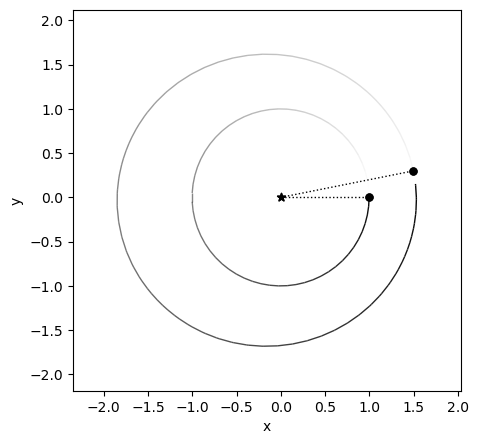

In [53]:
# show the initial orbits and their pericenters!
op = rebound.OrbitPlot(sim,periastron=True)    #looks cute! dotted lines show pericenters
# inner circle is the planet, outer one is the test particle

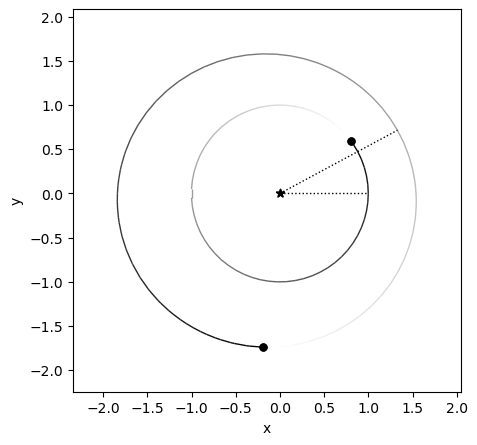

In [55]:
sim.integrate(2*np.pi*200) # integrate to 200 orbital periods later (of the planet) 
op = rebound.OrbitPlot(sim,periastron=True)   

Notice that the planet's pericenter stays fixed, but our test mass's pericenter has shifted

The test mass's orbit has precessed. 

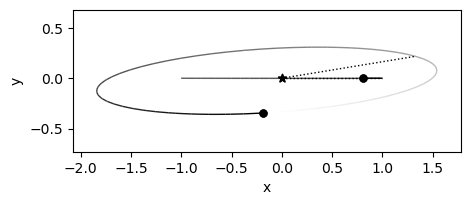

In [58]:
op = rebound.OrbitPlot(sim,periastron=True,projection ='xz')  # show a side view!

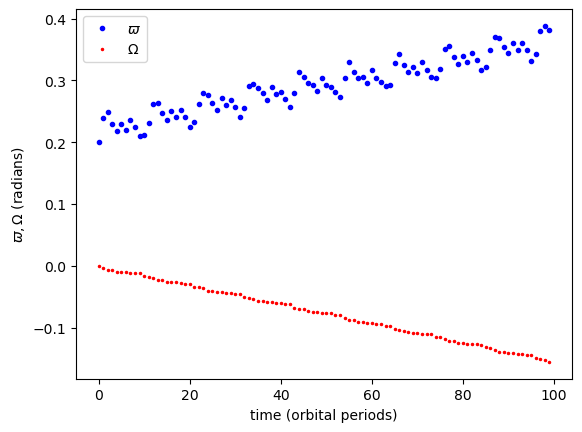

In [60]:
# I illustrate how we can store pomega (longitude of pericenter) and Omega (longitude of ascending node) as a function of time 

Nout = 100  # number of simulation outputs we want 
tarr = np.arange(Nout)*2*np.pi  # create an array of simulation output times 
# here Nout output times spaced by an orbital period of the planet which is 2pi
parr = tarr/(2*np.pi)  # time in units of orbital periods

pom_arr = np.zeros(Nout)   # an array to store the longitude of pericenter of the test particle at each output
long_arr = np.zeros(Nout)  # an array to store the longitude of the ascending node of the test particle at each output

# loop over integration times 
for i in range(Nout):
    sim.integrate(tarr[i]) # integrate to this time 
    p2 = sim.particles[2]  # this is our test particle 
    pom_arr[i] = p2.orbit().pomega  # save the longitude of pericenter in the pom_arr array 
    long_arr[i] = p2.orbit().Omega  # save the longitude of the ascending node in the long_arr array 

#plot the longitudes of pericenter and of the ascending node as a function of time 
fig, ax = plt.subplots(1,1)
ax.plot(parr,pom_arr,'b.', label =r'$\varpi$')  # plot time in orbital periods against longitude pericenter pomega in blue
ax.plot(parr,long_arr,'r.',label =r'$\Omega$',ms=3) # plot time in orbital periods against longitude of the ascending node Omega in red

# axis labels are nice
ax.set_xlabel('time (orbital periods)')
ax.set_ylabel(r'$\varpi, \Omega$ (radians)')
ax.legend()  # a nice legend!


## a) Fit a line to these points and so measure the drift (precession rates).
Below is an example of how to call polyfit to fit a line to a bunch of points

## b) Try running a simulation of a test mass interior to the planet to see if and how the  precession rates are different. 

slope = 0.1045


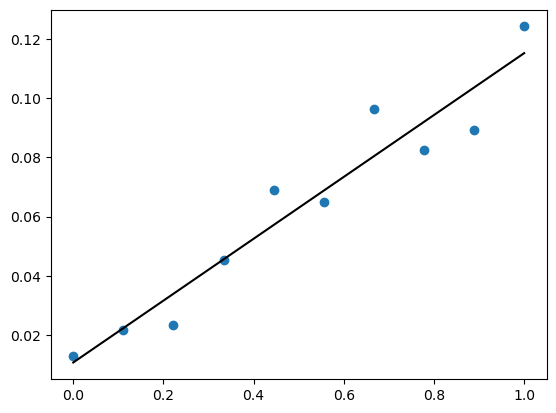

In [31]:
### Here is an example of how to fit a line to a bunch of points
xx = np.linspace(0,1,10)  # an array of x values
yy = xx*0.1 + np.random.uniform(0,0.03,10)  # create some points with some noise 
fig,ax = plt.subplots(1,1)
ax.plot(xx,yy,'o')
#fit a lines  using numpy's polyfit routine, see 
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
pcofs = np.polyfit(xx,yy,1) 
yy_fit = np.polyval(pcofs,xx)  # linear fit
ax.plot(xx,yy_fit,'k-')  # show the fit
# print the slope of our fit 
print('slope = {:.4f}'.format(pcofs[0]))
# note, not bothering to quantitatively discuss quality of fit 

# your goal is to write something similar but fitting to the arrays parr and pom_arr
